# Exam Project Anissa, Anna, Lilo

In [1]:
## This is our project that uses a machine learning model to classify audio tracks into genres
## After exploring and visualizing the data and clarifying why machine learning is the best approach to classify songs accurately in our presentation 
## we will now show you the machine learning model to help the music company (Harmonic Beats)

In [2]:
# import the necessary libaries
import pandas as pd
import numpy as np 

In [3]:
# load the data set
songs_data = pd.read_csv("../exam/data/songs_data.csv")

## Data Overview and summary of EDA

In [4]:
# Here we generate an overview to get familiar with the data
# summary of Exploratory Data Analysis as conducted in Milestone 1 of exam project 

In [5]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [6]:
songs_data.shape

(32833, 19)

In [7]:
songs_data.genre.value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

### Breakdown into Gernres

In [8]:
# delete?

In [9]:
rock_data = songs_data[songs_data.genre == "rock"]

In [10]:
pop_data = songs_data[songs_data.genre == "pop"]

In [11]:
rap_data = songs_data[songs_data.genre == "rap"]

In [12]:
latin_data = songs_data[songs_data.genre == "latin"]

In [13]:
rnb_data = songs_data[songs_data.genre == "r&b"]

In [14]:
edm_data = songs_data[songs_data.genre == "edm"]

## 1. Data Cleaning

In [15]:
# in order of developing an efficient model we will analyze the data to remove any redundant data and handle any missing values

### check for any missing data

In [16]:
# As part of the data cleaning we will check for any missing values in our dataset

In [17]:
songs_data.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
playlist_name       0
playlist_id         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [18]:
# we realize there are five values missing in columns "track_name" and "track_artisit"
# since these values fall under categories that we define as non-essential for genre classification (see below) there is no need to drop them


### check for duplicates

In [19]:
songs_data.duplicated().sum()

323

In [20]:
# dropping duplicates

In [21]:
print(songs_data.shape)
songs_data_cleaned = songs_data.drop_duplicates()
print(songs_data_cleaned.shape)


(32833, 19)
(32510, 19)


### identifying irrelevant features

In [22]:
# following columns we define as non-essential to genre classification
# they do not have meaningful correlation with genre 
# 

In [23]:
# Regarding the duration we thought that it could be quite useful for genre classification 
# because certain genres tend to have typical song lengths (e.g. rock songs typically longer than pop songs)
# we visualized each genre's duration to decide if it has meaningful correlation with genre


In [24]:
# IRRELEVANT BECAUSE I PUT DURATION BACK IN

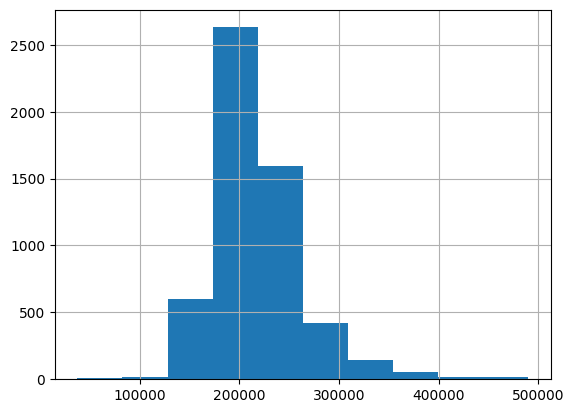

In [25]:
pop_data.duration_ms.hist();

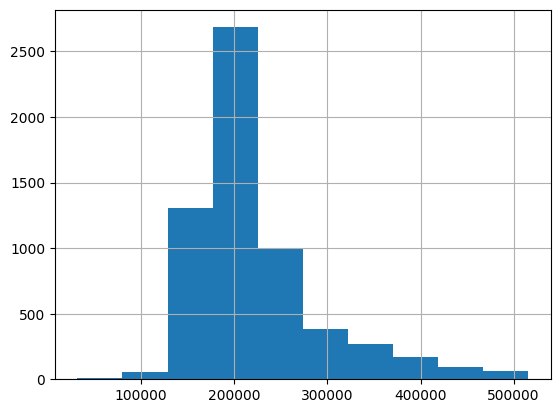

In [26]:
edm_data.duration_ms.hist();

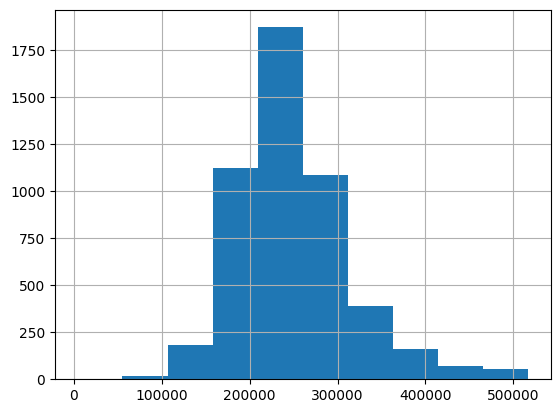

In [27]:
rock_data.duration_ms.hist();

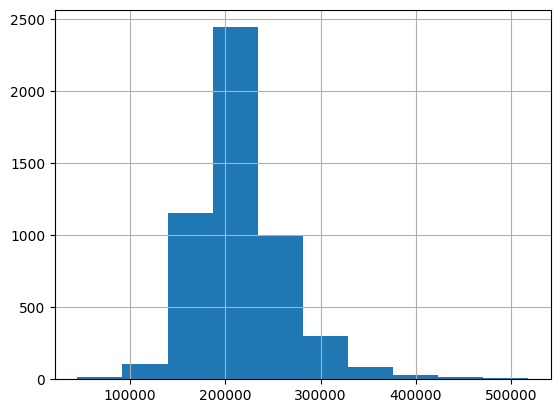

In [28]:
latin_data.duration_ms.hist();

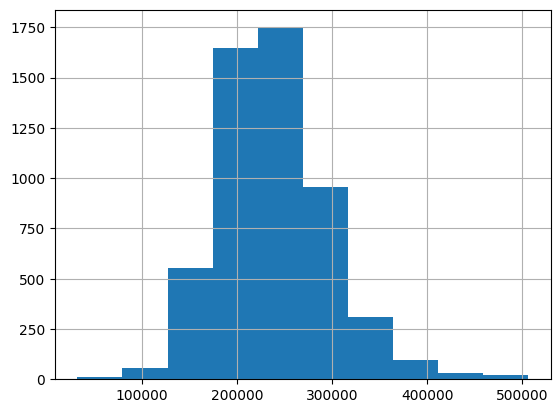

In [29]:
rnb_data.duration_ms.hist();

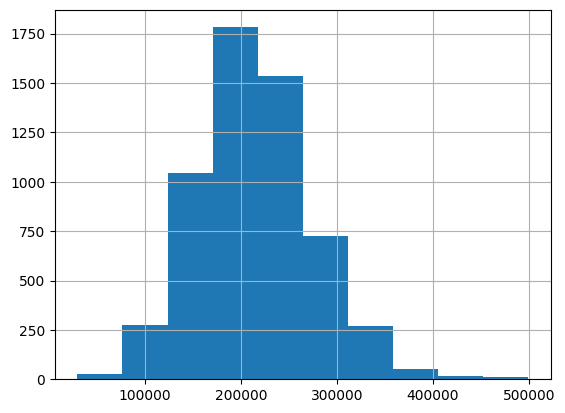

In [30]:
rap_data.duration_ms.hist();

In [31]:
# decided that the differences between the genres were not big enough to determine anything and decided to drop the column as well

In [32]:
songs_data_cleaned = songs_data.drop(columns=['track_name', 'track_id', 'track_artist',  'playlist_id','mode','key'])

In [33]:
# put duration_ms  and INSTRUMENTALNESS back in 

In [34]:
songs_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32833 non-null  int64  
 1   playlist_name     32833 non-null  object 
 2   genre             32833 non-null  object 
 3   danceability      32833 non-null  float64
 4   energy            32833 non-null  float64
 5   loudness          32833 non-null  float64
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
 12  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 3.3+ MB


In [35]:
print(songs_data_cleaned.shape)

(32833, 13)


## remove outliers

In [36]:
# check every characteristc for outliers and remove them

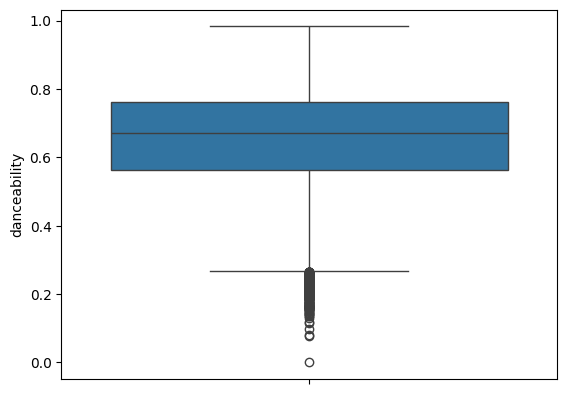

In [37]:
import seaborn as sns
#distribution of danceability
sns.boxplot(y=songs_data_cleaned.danceability);

In [38]:
# remove outliers
# reference: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['danceability'] > 0.28]

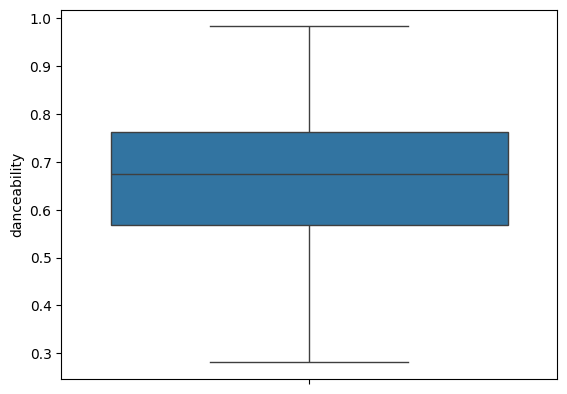

In [39]:
sns.boxplot(y=songs_data_cleaned.danceability);

In [40]:
print(songs_data_cleaned.shape)

(32436, 13)


In [41]:
#repeat for the other categories
# key and valnece have no outliers so no need to remove some

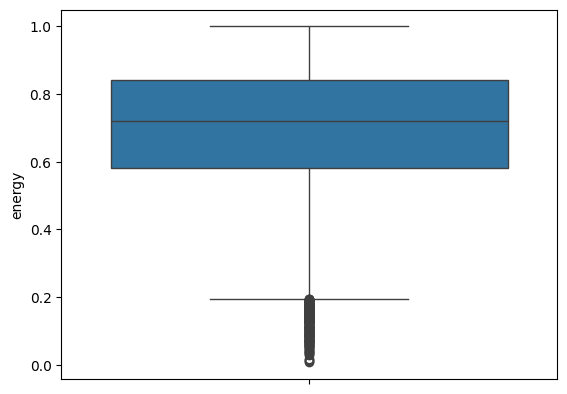

In [42]:
sns.boxplot(y=songs_data_cleaned.energy);

In [43]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['energy'] > 0.21]

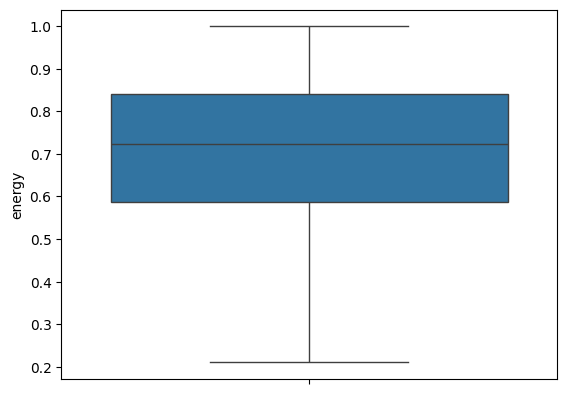

In [44]:
sns.boxplot(y=songs_data_cleaned.energy);

In [45]:
print(songs_data_cleaned.shape)

(32111, 13)


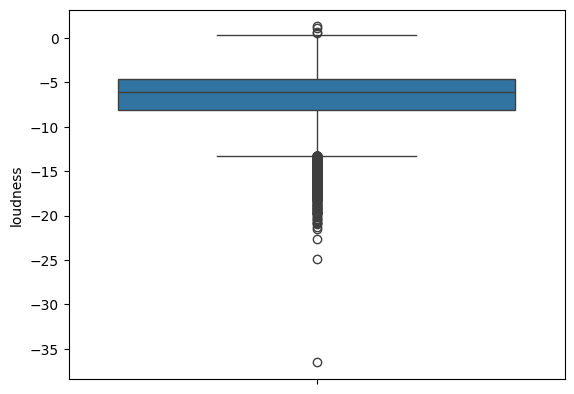

In [46]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [47]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] > -12.5]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] < 0]

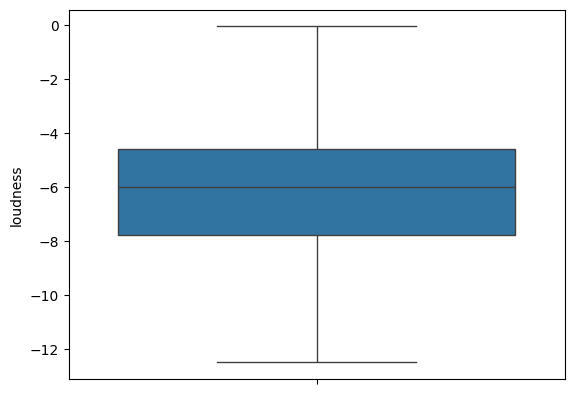

In [48]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [49]:
print(songs_data_cleaned.shape)

(30785, 13)


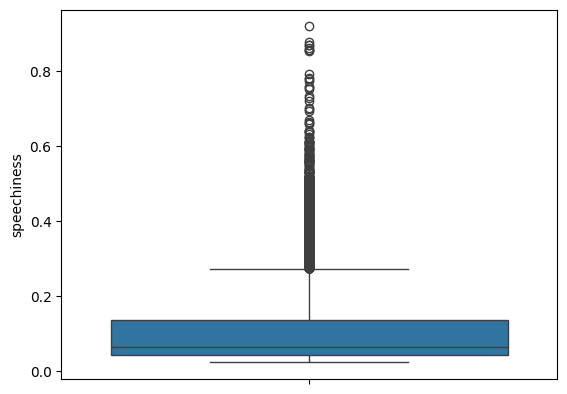

In [50]:
sns.boxplot(y=songs_data_cleaned.speechiness);

In [51]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['speechiness'] < 0.11]

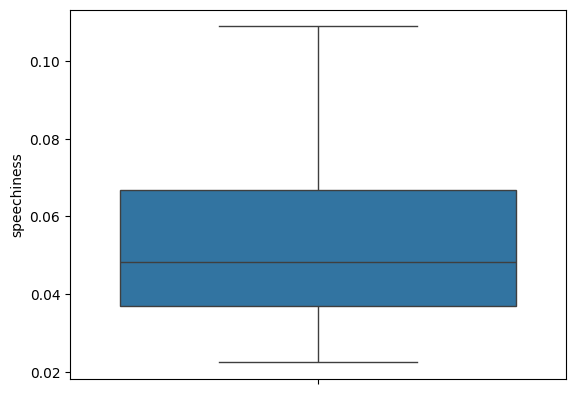

In [52]:
sns.boxplot(y=songs_data_cleaned.speechiness);

In [53]:
print(songs_data_cleaned.shape)

(21427, 13)


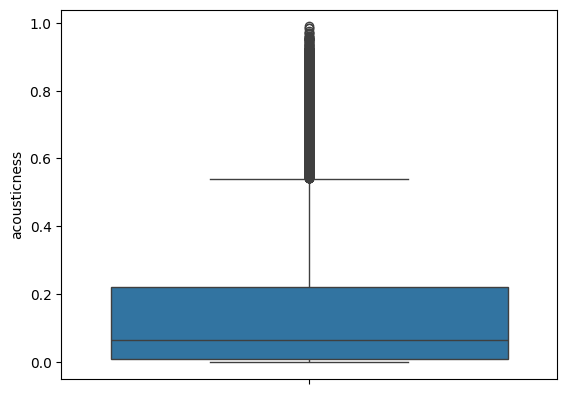

In [54]:
sns.boxplot(y=songs_data_cleaned.acousticness);

In [55]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['acousticness'] < 0.19]

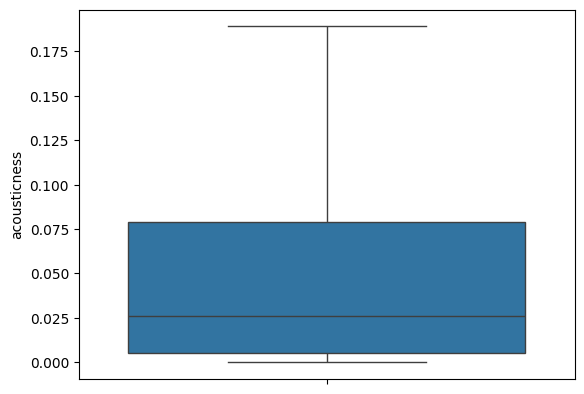

In [56]:
sns.boxplot(y=songs_data_cleaned.acousticness);

In [57]:
print(songs_data_cleaned.shape)

(15292, 13)


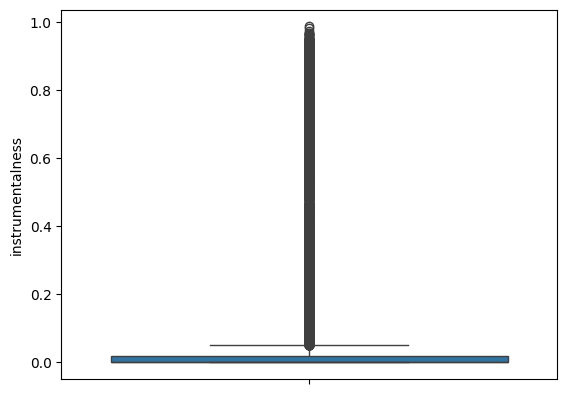

In [58]:
sns.boxplot(y=songs_data_cleaned.instrumentalness);

In [59]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['instrumentalness'] > 0.2]

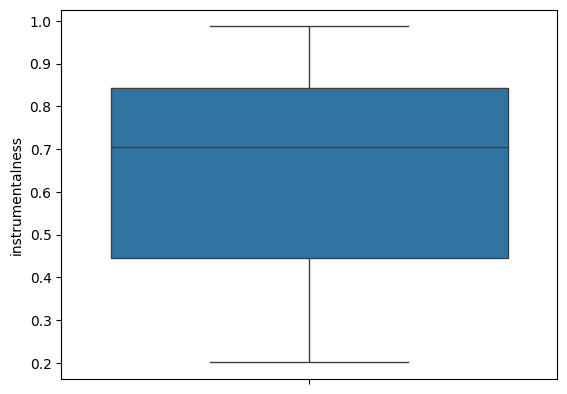

In [60]:
sns.boxplot(y=songs_data_cleaned.instrumentalness);

In [61]:
print(songs_data_cleaned.shape)

(2361, 13)


In [62]:
#sns.boxplot(y=songs_data_cleaned.liveness);

In [63]:
#songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['liveness'] > 0.5]

In [64]:
#sns.boxplot(y=songs_data_cleaned.liveness);

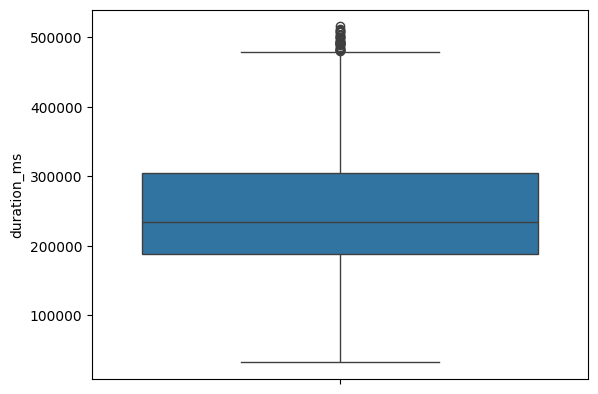

In [65]:
sns.boxplot(y=songs_data_cleaned.duration_ms);

In [66]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['duration_ms'] > 110000]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['duration_ms'] < 300000]

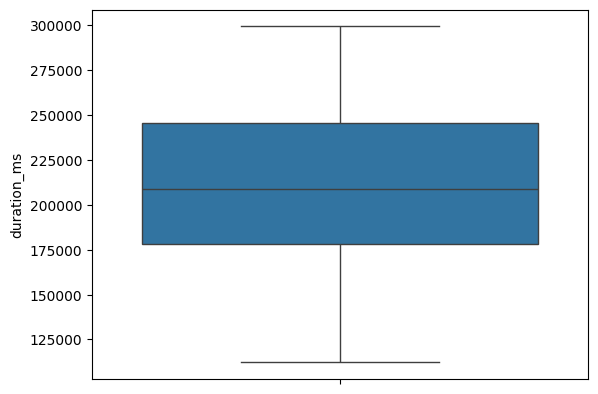

In [67]:
sns.boxplot(y=songs_data_cleaned.duration_ms);

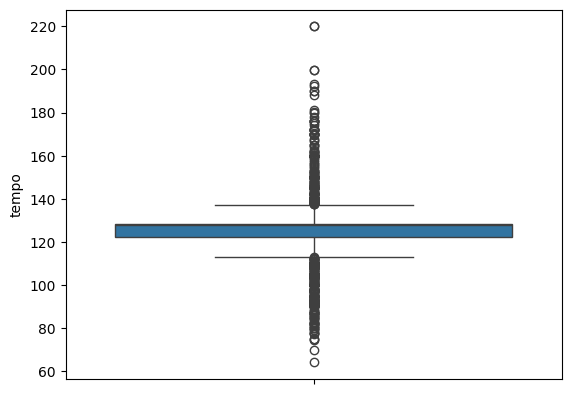

In [68]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [69]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] > 70]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] < 160]

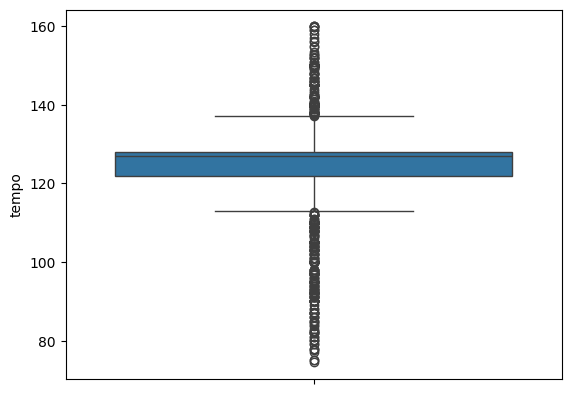

In [70]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [71]:
print(songs_data_cleaned.shape)

(1679, 13)


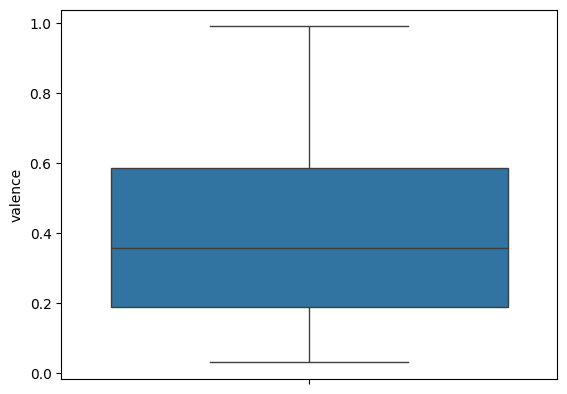

In [72]:
sns.boxplot(y=songs_data_cleaned.valence);

In [73]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
45,61,Pop Remix,pop,0.622,0.859,-7.626,0.0636,0.000609,0.746,0.0909,0.442,121.968,218373
169,57,Dance Room,pop,0.708,0.727,-7.647,0.0389,0.020100,0.676,0.3700,0.512,120.012,231480
171,65,Dance Room,pop,0.945,0.584,-7.649,0.0440,0.095500,0.341,0.1470,0.626,124.996,168547
202,48,Dance Room,pop,0.570,0.965,-4.881,0.0348,0.001080,0.523,0.2010,0.148,123.008,291785
324,55,Dance Pop Hits,pop,0.497,0.924,-3.430,0.0434,0.149000,0.251,0.2670,0.283,120.018,150005


In [74]:
#songs_data_cleaned.key.value_counts()

# 2. Feature Engineering

## Label Encoding

In [75]:
# first thing we do in feature engineering is that we need to transform the object types into numbers by using label encoding

In [76]:
songs_data_cleaned['genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [77]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
genre_encoded = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
songs_data_cleaned['genre']= genre_encoded.fit_transform(songs_data_cleaned['genre']) 
  
songs_data_cleaned['genre'].unique() 

array([2, 4, 5, 1, 3, 0])

In [78]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
45,61,Pop Remix,2,0.622,0.859,-7.626,0.0636,0.000609,0.746,0.0909,0.442,121.968,218373
169,57,Dance Room,2,0.708,0.727,-7.647,0.0389,0.020100,0.676,0.3700,0.512,120.012,231480
171,65,Dance Room,2,0.945,0.584,-7.649,0.0440,0.095500,0.341,0.1470,0.626,124.996,168547
202,48,Dance Room,2,0.570,0.965,-4.881,0.0348,0.001080,0.523,0.2010,0.148,123.008,291785
324,55,Dance Pop Hits,2,0.497,0.924,-3.430,0.0434,0.149000,0.251,0.2670,0.283,120.018,150005


In [79]:
# Label encoding the 'playlist_name' column

# Create a label encoder object
playlist_encoded = preprocessing.LabelEncoder()

# Encode the 'playlist_name' column using the label encoder
songs_data_cleaned['playlist_name']= playlist_encoded.fit_transform(songs_data_cleaned['playlist_name'])

songs_data_cleaned['playlist_name'].unique()

# Display the first five rows of the updated DataFrame
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
45,61,169,2,0.622,0.859,-7.626,0.0636,0.000609,0.746,0.0909,0.442,121.968,218373
169,57,59,2,0.708,0.727,-7.647,0.0389,0.020100,0.676,0.3700,0.512,120.012,231480
171,65,59,2,0.945,0.584,-7.649,0.0440,0.095500,0.341,0.1470,0.626,124.996,168547
202,48,59,2,0.570,0.965,-4.881,0.0348,0.001080,0.523,0.2010,0.148,123.008,291785
324,55,57,2,0.497,0.924,-3.430,0.0434,0.149000,0.251,0.2670,0.283,120.018,150005


In [80]:
# the next step is to encode the track id into numerical type data

In [81]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
45,61,169,2,0.622,0.859,-7.626,0.0636,0.000609,0.746,0.0909,0.442,121.968,218373
169,57,59,2,0.708,0.727,-7.647,0.0389,0.020100,0.676,0.3700,0.512,120.012,231480
171,65,59,2,0.945,0.584,-7.649,0.0440,0.095500,0.341,0.1470,0.626,124.996,168547
202,48,59,2,0.570,0.965,-4.881,0.0348,0.001080,0.523,0.2010,0.148,123.008,291785
324,55,57,2,0.497,0.924,-3.430,0.0434,0.149000,0.251,0.2670,0.283,120.018,150005


## Creating New Features to improve accuracy 

In [82]:
#songs_data_cleaned['danceability_energy'] = songs_data_cleaned['danceability'] * songs_data_cleaned['energy']

In [83]:
#songs_data_cleaned['acoustic_instrumental'] = songs_data_cleaned['track_popularity'] * songs_data_cleaned['valence']

In [84]:
#songs_data_cleaned['valence_dance'] = songs_data_cleaned['valence'] * songs_data_cleaned['danceability']

In [85]:
#songs_data_cleaned['speechiness_acousticness'] = songs_data_cleaned['speechiness'] * songs_data_cleaned['acousticness']

In [86]:
#songs_data_cleaned['track_popularity_energy'] = songs_data_cleaned['track_popularity'] * songs_data_cleaned['energy']

In [87]:
#songs_data_cleaned['valence_energy'] = songs_data_cleaned['valence'] * songs_data_cleaned['energy']

In [88]:
#songs_data_cleaned['tempo_valence'] = songs_data_cleaned['tempo'] * songs_data_cleaned['valence']

In [89]:
#songs_data_cleaned['loudness_instrumentalness'] = songs_data_cleaned['loudness'] * songs_data_cleaned['instrumentalness']

In [90]:
#songs_data_cleaned['danceability_energy'] = songs_data_cleaned['danceability'] * songs_data_cleaned['energy']

In [91]:
#songs_data_cleaned.tempo.max()

In [92]:
#songs_data_cleaned['tempo_bin'] = pd.cut( songs_data_cleaned['tempo'], bins=[0, 40, 80, 120, 161], labels=[1, 2, 3, 4])

In [93]:
#songs_data_cleaned['tempo_bin'].unique()

In [94]:
#tempo_encoded = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
#songs_data_cleaned['tempo_bin']= tempo_encoded.fit_transform(songs_data_cleaned['tempo_bin']) 
  
#songs_data_cleaned['tempo_bin'].unique() 

In [95]:
#songs_data_cleaned['loudness_bin'] = pd.cut( songs_data_cleaned['loudness'], bins=[-60, -30, -10, 0], labels = [1,2,3])

In [96]:
#loudness_encoded = preprocessing.LabelEncoder() 
   
#songs_data_cleaned['loudness_bin']= tempo_encoded.fit_transform(songs_data_cleaned['loudness_bin']) 
  
#songs_data_cleaned['loudness_bin'].unique()

In [97]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
45,61,169,2,0.622,0.859,-7.626,0.0636,0.000609,0.746,0.0909,0.442,121.968,218373
169,57,59,2,0.708,0.727,-7.647,0.0389,0.020100,0.676,0.3700,0.512,120.012,231480
171,65,59,2,0.945,0.584,-7.649,0.0440,0.095500,0.341,0.1470,0.626,124.996,168547
202,48,59,2,0.570,0.965,-4.881,0.0348,0.001080,0.523,0.2010,0.148,123.008,291785
324,55,57,2,0.497,0.924,-3.430,0.0434,0.149000,0.251,0.2670,0.283,120.018,150005


## Splitting the Data into training and test data sets

In [98]:
# define the target and features

features = songs_data_cleaned.drop(['genre' ], axis=1)
target = songs_data_cleaned['genre']

In [99]:
features.head()

,track_popularity,playlist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
45,61,169,0.622,0.859,-7.626,0.0636,0.000609,0.746,0.0909,0.442,121.968,218373
169,57,59,0.708,0.727,-7.647,0.0389,0.020100,0.676,0.3700,0.512,120.012,231480
171,65,59,0.945,0.584,-7.649,0.0440,0.095500,0.341,0.1470,0.626,124.996,168547
202,48,59,0.570,0.965,-4.881,0.0348,0.001080,0.523,0.2010,0.148,123.008,291785
324,55,57,0.497,0.924,-3.430,0.0434,0.149000,0.251,0.2670,0.283,120.018,150005


In [100]:
features.shape

(1679, 12)

In [101]:
target.head()

45     2
169    2
171    2
202    2
324    2
Name: genre, dtype: int64

In [102]:
target.shape

(1679,)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.3,
                                                    random_state=8888)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [104]:
X_train.shape

(1175, 12)

In [105]:
X_test.shape

(504, 12)

# 3. Developing the Machine Learning Model

## 1st approach

In [106]:
# starting with the existing features and evaluating the models performance to decide if additional feature engineering is necessary

In [107]:
from sklearn.ensemble import RandomForestClassifier

# using the max_depth parameter to solve overfitting

aal_rf = RandomForestClassifier()
  


# max_depth=2, n_estimators=30,
    #min_samples_split=3, max_leaf_nodes=5,
    #random_state=22
# reference: https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/

In [108]:
aal_rf.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
y_pred_rf = aal_rf.predict(X_test)

In [110]:
from sklearn import metrics

print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             aal_rf.predict(X_train))*100)
print('Testing Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             aal_rf.predict(X_test))*100)

# reference: https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/

Training Accuracy :  99.74468085106383
Testing Accuracy :  75.79365079365078


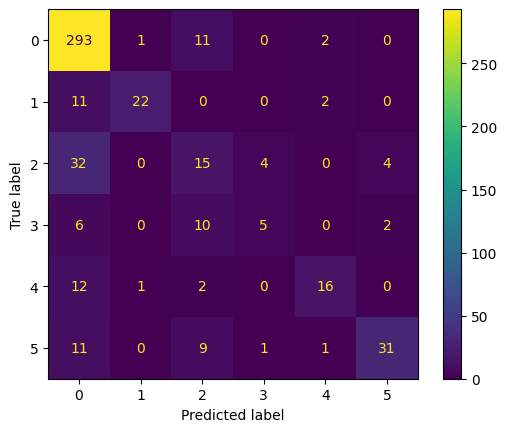

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=aal_rf.classes_)

disp.plot();

In [112]:
# accuracy for whole algorithm

In [113]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_rf)

0.7579365079365079

In [114]:
# Precision of the individual genre classifications

In [115]:
# reference: https://www.geeksforgeeks.org/machine-learning-model-evaluation/?ref=gcse_outind

from sklearn.metrics import precision_score
# Calculate precision for genres
# edm 
precision_genre_0 = precision_score(y_test, y_pred_rf, labels=[0], average='weighted')
print(precision_genre_0)
# latin
precision_genre_1 = precision_score(y_test, y_pred_rf, labels=[1], average='weighted')
print(precision_genre_1)
# pop
precision_genre_2 = precision_score(y_test, y_pred_rf, labels=[2], average='weighted')
print(precision_genre_2)
# r&b
precision_genre_3 = precision_score(y_test, y_pred_rf, labels=[3], average='weighted')
print(precision_genre_3)
# rap
precision_genre_4 = precision_score(y_test, y_pred_rf, labels=[4], average='weighted')
print(precision_genre_4)
# rock
precision_genre_5 = precision_score(y_test, y_pred_rf, labels=[5], average='weighted')
print(precision_genre_5)

0.8027397260273973
0.9166666666666665
0.3191489361702127
0.5
0.7619047619047619
0.8378378378378378


In [116]:
# we need to further distinguish the genres latin, pop and r&b 
# genres like rock and edm are more different and more easily distinguishable for the algorithm

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

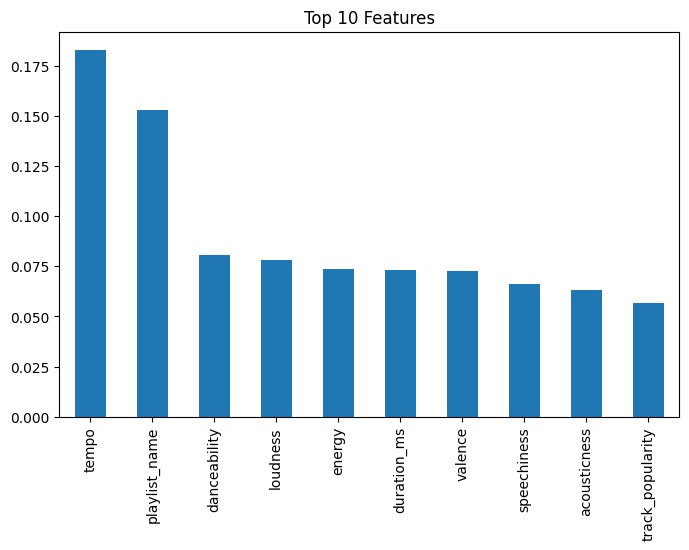

In [118]:
feature_importance_plot(aal_rf, X_train, n = 10)

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score


def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation
    
    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target
    
    @returns a plot of the learning curve
    """
    
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

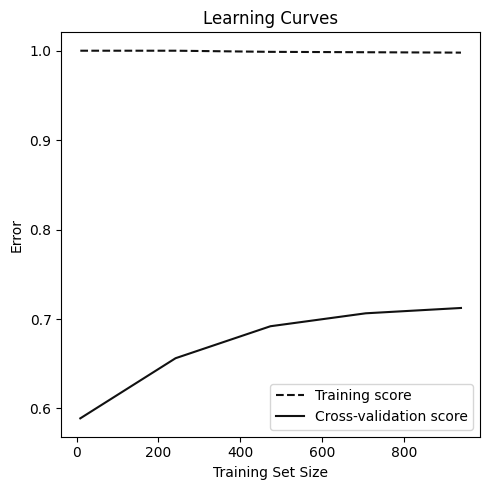

In [120]:
learning_curve_plot(aal_rf, X_train, y_train, scoring = 'accuracy')

# XGBoost

In [121]:

#!pip install xgboost

In [122]:
#from xgboost import XGBClassifier

#aal_xgb = XGBClassifier()

In [123]:
#aal_xgb.fit(X_train, y_train)

In [124]:
#y_pred_xgb = aal_xgb.predict(X_test)

In [125]:
#cm = confusion_matrix(y_test, y_pred_xgb)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              # display_labels=aal_xgb.classes_)

#disp.plot();

In [126]:
#precision_score(y_test, y_pred_xgb)

# 4. Evaluation